In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None # Get rid of annoying warning
import numpy as np
import os
import matplotlib.pyplot as plt

# Change font size based on https://stackoverflow.com/a/39566040
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
magatDataPath = ["/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSPIBT_NoRandom.csv",
                 "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update_naive.csv",
                 "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update_pibt_tiebreak.csv",
                 "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update_pibt.csv",
                 "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_no_random.csv"][-1]

In [3]:
dfMain = pd.read_csv(magatDataPath)
dfMain["solved"] = dfMain["magatSucceed"]
dfMain["soc"] = dfMain["magatCost"]

In [4]:
### Get MAGAT data for table
df = pd.read_csv(magatDataPath)
df["solved"] = df["magatSucceed"]
df["soc"] = df["magatCost"]

for agentNum in df["agents"].unique():
    agentDf = df.loc[df["agents"] == agentNum]
    tmp = agentDf["magatSucceed"].mean()
    print(f"{agentNum}, {len(agentDf)}, {tmp}")
    agentDf = agentDf.loc[agentDf["magatSucceed"] == 1]
    # print(agentDf["magatCost"].median())
    
constraintDf = df

50, 125, 0.84
100, 125, 0.488
150, 125, 0.16
200, 125, 0.0
250, 125, 0.0
300, 125, 0.0
350, 125, 0.0


In [5]:
### Get LaCAM data for table
lacamBasePath = ["/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv", # LaCAM
                 "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_pibt_20seeds.csv", # PIBT
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_5seeds.csv", # \pi
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_pibt_5seeds.csv", # \pi + PIBT
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_tiebreak_5seeds.csv", # \pi + tiebreak
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_lacam_5seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_naive.csv", # MAGAT CS-Naive
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt.csv", # MAGAT CS-PIBT
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_no_random.csv", # MAGAT CS-PIBT No Random
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_tiebreak.csv", # MAGAT Tiebreak
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_lacam.csv", # MAGAT LaCAM
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_lacam_tiebreak.csv"] # MAGAT LaCAM Tiebreak

for aFile in lacamBasePath:
    df = readAnyCSV(aFile)
    allData = []
    for agentNum in df["agents"].unique():
        agentDf = df.loc[df["agents"] == agentNum]
        tmp = agentDf["solved"].mean()
        allData.append(tmp)
    
    print(f"{aFile}, \n {allData}")

    # print allData in column form
    for i in range(len(allData)):
        print(allData[i])

# lacamBasePath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_noisy_{}_{}_5seeds.csv".format("lacam", 10)

# dfMain = pd.read_csv(lacamBasePath[1])
# # df = pd.merge(dfMain, constraintDf, on=["scen_name", "agents", "seed"], how="inner", suffixes=("", "_base"))
# # df = df.loc[df["solved_base"] == 1]

# for agentNum in df["agents"].unique():
#     agentDf = df.loc[df["agents"] == agentNum]
#     # agentDf = agentDf.loc[agentDf["total_nodes_opened"] < 1]
#     # agentDf["solved"] = (agentDf["total_nodes_opened"] < 1000) & (agentDf["solved"] == 1)
#     print(agentNum, len(agentDf), agentDf["solved"].mean())
#     agentDf = agentDf.loc[agentDf["solved"] == 1]
#     print(len(agentDf), agentDf["soc"].median())

NameError: name 'readAnyCSV' is not defined

In [6]:
def readAnyCSV(path):
    df = pd.read_csv(path)
    if "magat" in path:
        df["solved"] = df["magatSucceed"]
        if "update" in path:
            df["soc"] = df["magatCost"] - df["agents"] # Updated version overcounts costs
        else:
            df["soc"] = df["magatCost"]

    joinColumn = ["agents", "scen_name"] # Should aggregate across seeds
    resultCols = [x for x in df.columns if x not in joinColumn]
    def aggStats(data):
        d = {}
        d["solved"] = np.mean(data["solved"])
        data2 = data[data["soc"] > 0]  # Only keep successes
        for aKey in resultCols:
            if aKey in ["scen_name", "seed", "map_file"]:
                d[aKey] = data[aKey].iloc[0]
                continue
            if data[aKey].dtype == str or aKey == "solved":
                continue
            d[aKey] = data2[aKey].median()
        return pd.Series(d)
    df = df.groupby(joinColumn, as_index=False, sort=False).apply(aggStats)

    return df

In [7]:
# df = readAnyCSV(lacamBasePath[0])
df = readAnyCSV(magatDataPath)
# df["solved"]
df

,agents,scen_name,solved,magatCost,magatMakespan,magatSucceed,pibtShieldTime,naiveShieldTime,numLacamNodes,totalTime,ECBSCost,ECBSMakespan,seed,scen,map_file,soc
0,50,scripts/scen/scen-random/random-32-32-10-rando...,0.0,1158.0,55.0,0.0,0.109705,0.0,0.0,3.851497,1122.0,53.0,1,1.0,random-32-32-10.map,1108.0
1,50,scripts/scen/scen-random/random-32-32-10-rando...,1.0,1175.0,47.0,1.0,0.031472,0.0,0.0,0.985578,1085.0,47.0,1,2.0,random-32-32-10.map,1125.0
2,50,scripts/scen/scen-random/random-32-32-10-rando...,1.0,1286.0,47.0,1.0,0.031235,0.0,0.0,0.984469,1170.0,47.0,1,3.0,random-32-32-10.map,1236.0
3,50,scripts/scen/scen-random/random-32-32-10-rando...,0.0,1066.0,47.0,0.0,0.097458,0.0,0.0,2.990502,1088.0,47.0,1,4.0,random-32-32-10.map,1016.0
4,50,scripts/scen/scen-random/random-32-32-10-rando...,1.0,1362.0,49.0,1.0,0.032697,0.0,0.0,1.027645,1188.0,48.0,1,5.0,random-32-32-10.map,1312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,350,scripts/scen/scen-random/random-32-32-10-rando...,0.0,29885.0,186.0,0.0,1.804981,0.0,0.0,28.565304,350.0,1.0,1,21.0,random-32-32-10.map,29535.0
171,350,scripts/scen/scen-random/random-32-32-10-rando...,0.0,29477.0,204.0,0.0,1.971665,0.0,0.0,31.329917,350.0,1.0,1,22.0,random-32-32-10.map,29127.0
172,350,scripts/scen/scen-random/random-32-32-10-rando...,0.0,24872.0,177.0,0.0,2.135262,0.0,0.0,27.589071,350.0,1.0,1,23.0,random-32-32-10.map,24522.0
173,350,scripts/scen/scen-random/random-32-32-10-rando...,0.0,26360.0,201.0,0.0,1.938125,0.0,0.0,30.891596,350.0,1.0,1,24.0,random-32-32-10.map,26010.0


### Get "Successful" Data for Table

In [8]:
### DF Main
lacamBasePath = ["/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv", # LaCAM
                 "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_pibt_20seeds.csv", # PIBT
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_5seeds.csv", # \pi
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_pibt_5seeds.csv", # \pi + PIBT
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_tiebreak_5seeds.csv", # \pi + tiebreak
                # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_naive_collision_5seeds.csv",
                # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_pibt_no_random_5seeds.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_lacam_5seeds.csv",
                # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_pibt_5seeds.csv",
                # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSPIBT_NoRandom.csv",
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_naive.csv", # MAGAT CS-Naive
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt.csv", # MAGAT CS-PIBT
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_tiebreak.csv", # MAGAT Tiebreak
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_lacam.csv", # MAGAT LaCAM
                "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_lacam_tiebreak.csv"] # MAGAT LaCAM Tiebreak
labels = [
    "LaCAM",
    "PIBT",
    r"$\pi$ + LaCAM",
    r"$\pi$ + PIBT",
    r"$\pi$ + tiebreak",
    # r"$\pi$ + naive collision",
    # r"$\pi$ + PIBT no random",
    "LaCAM Manhattan",
    # "PIBT Manhattan",
    # "MAGAT CS-PIBT Random",
    "MAGAT CS-Naive",
    "MAGAT CS-PIBT",
    "MAGAT PIBT tiebreak",
    "MAGAT LaCAM",
    "MAGAT LaCAM tiebreak",
]

agentNum = 400
# dfConstrained = readAnyCSV(lacamBasePath[-3])
dfConstrained = readAnyCSV(lacamBasePath[0])
dfConstrained = dfConstrained.loc[dfConstrained["agents"] == agentNum]
for i in range(1, len(lacamBasePath)):
    # print(lacamBasePath[i])
    dfTest = readAnyCSV(lacamBasePath[i])
    dfTest = dfTest.loc[(dfTest["agents"] == agentNum) & (dfTest["solved"] == 1)]
    if len(dfTest) < 25/2:
        print("Skipping", lacamBasePath[i], len(dfTest))
        continue
    joinCols = ["scen_name", "agents", "seed"]
    dfTest = dfTest[joinCols + ["solved"]]
    dfConstrained = pd.merge(dfTest, dfConstrained, on=joinCols, how="inner", suffixes=("", "_base"))
    dfConstrained = dfConstrained.loc[dfConstrained["solved_base"] == 1]
    dfConstrained.drop(columns=["solved_base"], inplace=True)
print(dfConstrained.shape)

# orderedTable = [5, 1, 0, 6, 7, 8, 3, 2, 4]
orderedTable = [5, 1, 0, 6, 7, 8, 9, 10, 3, 2, 4]
rowData = []
for i in range(len(lacamBasePath)):
    # print(lacamBasePath[i])
    print(labels[i], lacamBasePath[i])
    dfTest = readAnyCSV(lacamBasePath[i])
    dfTest = dfTest.loc[(dfTest["agents"] == agentNum) & (dfTest["solved"] == 1)]
    if len(dfTest) < 25/2:
        print(len(dfTest), "Failed too much")
        rowData.append(-1)
        continue

    df = pd.merge(dfTest, dfConstrained, on=["scen_name", "agents", "seed"], how="inner", suffixes=("", "_base"))
    df = df.loc[df["solved_base"] == 1]

    # for agentNum in df["agents"].unique():
    agentDf = df.loc[df["agents"] == agentNum]
    # agentDf = agentDf.loc[agentDf["total_nodes_opened"] < 1]
    # agentDf["solved"] = (agentDf["total_nodes_opened"] < 1000) & (agentDf["solved"] == 1)
    # print(agentNum, len(agentDf), agentDf["solved"].mean())
    # agentDf = agentDf.loc[agentDf["solved"] == 1]
    print(len(agentDf), agentDf["soc"].median())
    rowData.append(agentDf["soc"].median())

rowData = np.array(rowData)[orderedTable]
orderedLabels = [labels[x] for x in orderedTable]
# print the array comma seperated rounded down to nearest int
print(", ".join(orderedLabels))
print(", ".join([str(int(x)) for x in rowData]))

Skipping /home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_pibt_20seeds.csv 1
Skipping /home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_5seeds.csv 5
Skipping /home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_pibt_5seeds.csv 0
Skipping /home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_tiebreak_5seeds.csv 8
Skipping /home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_naive.csv 0
Skipping /home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt.csv 0
Skipping /home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_tiebreak.csv 0
Skipping /home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_lacam.csv 0
(11, 14)
LaCA

In [9]:
###  Parsing LaCAM data
# lacamDataPath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv"
lacamDataPath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_5seeds.csv"
df = pd.read_csv(lacamDataPath)
# pd.plot.hist(df["total_nodes_opened"], bins=100)
# print(df["total_nodes_opened"])
# df.boxplot(column="total_nodes_opened")
# plt.yscale("log")
df["total_nodes_opened"].max()

6894

In [10]:
def convertStringToArray(aStr):
    return [int(x) for x in aStr.split("\n")]

### Small Teaser Plot

In [11]:
### Small teaser plot
agentNum = [50, 100, 150, 200]
# pibt = [0.98, 0.98, 0.83, 0.55, 0.4]
magatNaive = [0.904, 0.424, 0.016, 0.0]
magatPibt = [1, 0.976, 0.768, 0.592]
simpleNaive = [0, 0, 0, 0, 0]
simplePIBT = [0.92, 0.88, 0.592, 0, 0]
simpleLaCAM = [1, 1, 0.992, 0.896, 0.576]

data = {"agents": agentNum, "MAGAT": magatNaive, "MAGAT w/CS-PIBT": magatPibt}#, "PIBT": pibt}
        # "simpleNN": simpleNaive, "simpleNN w/LaCAM": simpleLaCAM}#}

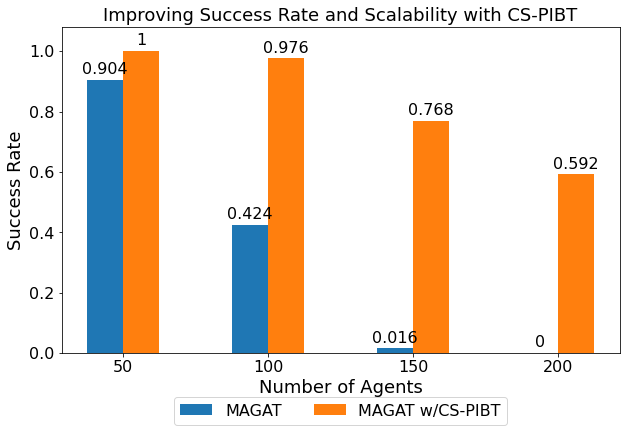

In [12]:

x = np.arange(len(agentNum))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
fig, ax = plt.subplots(figsize=(10, 6))

for attribute, measurement in data.items():
    if attribute == "agents":
        continue
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rate')
ax.set_xlabel('Number of Agents')
ax.set_title('Improving Success Rate and Scalability with CS-PIBT')
ax.set_xticks(x + width - width/2, agentNum)
# ax.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=4)
ax.set_ylim(0, 1.08)

# plt.show()
filename = "successRate.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=600)

### Effect of Action Ordering figure

In [13]:
agentNum = np.array([50, 100, 150, 200])
# csPIBT = np.array([1, 0.976, 0.848, 0.8])
# csPIBTNoRandom = np.array([0.84, 0.52, 0.16, 0])
csPIBT = np.array([1, 0.976, 0.768, 0.592])
csPIBTNoRandom = np.array([0.84, 0.488, 0.16, 0.0])

ours = np.array([0.92, 0.88, 0.704, 0.592])
ourNoRandom = np.array([0.84, 0.52, 0.36, 0])

data = {"MAGAT-No": csPIBTNoRandom, "MAGAT": csPIBT,
        "Ours": ours, "Ours-No": ourNoRandom}
# data["MAGAT"] = data["MAGAT"] - data["MAGAT-No"]

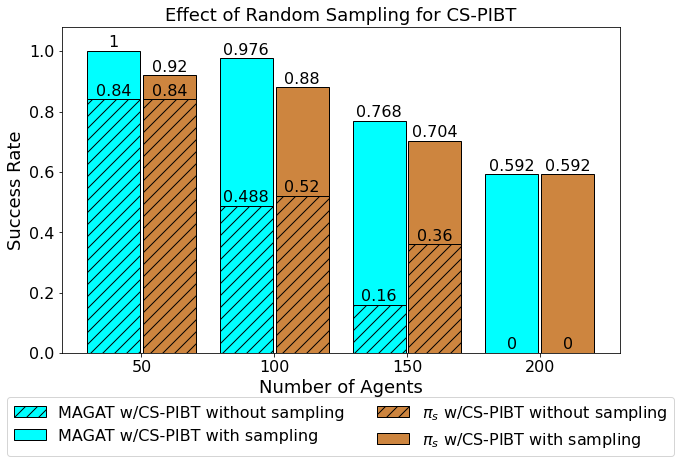

In [14]:
x = np.arange(len(agentNum))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
fig, ax = plt.subplots(figsize=(10, 6))

# for attribute, measurement in data.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3)
#     multiplier += 1
keyToKey = {"MAGAT-No": "MAGAT w/CS-PIBT with sampling", 
            "MAGAT": "MAGAT w/CS-PIBT without sampling",
            "Ours-No": "$\pi_s$ w/CS-PIBT with sampling", 
            "Ours": "$\pi_s$ w/CS-PIBT without sampling"}
for key, extraOffset, c in zip(["MAGAT", "Ours"], [-0.01, 0.01], ['cyan', 'peru']):
    offset = width * multiplier + extraOffset
    value1 = data[key]
    value2 = data[key + "-No"]
    bottom = np.zeros(len(agentNum))
    p = ax.bar(x+offset, value2, width, label=keyToKey[key], bottom=bottom, facecolor=c, edgecolor='black', hatch='//')
    ax.bar_label(p, padding=1)
    p = ax.bar(x+offset, value1-value2, width, label=keyToKey[key+"-No"], bottom=value2, edgecolor="black", facecolor=c)
    ax.bar_label(p, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success Rate')
ax.set_xlabel('Number of Agents')
ax.set_title('Effect of Random Sampling for CS-PIBT')
ax.set_xticks(x + width - width/2, agentNum)
# # ax.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=2)
ax.set_ylim(0, 1.08)

# plt.show()
filename = "fig-random-sample.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=600)

### Plot for noise

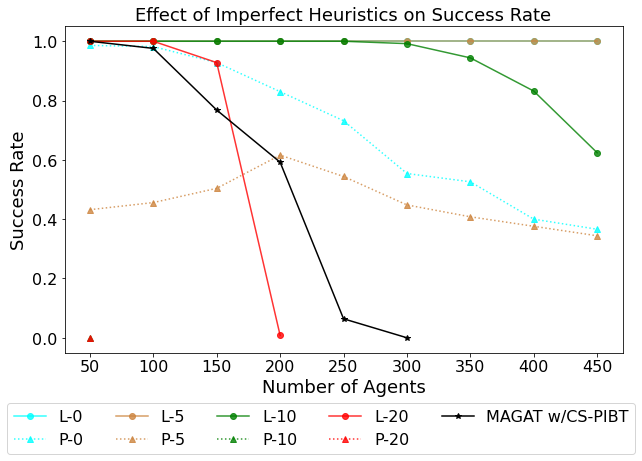

In [33]:
lacamDataFunc = lambda x, noise: "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_noisy_{}_{}_5seeds.csv".format(x, noise)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['cyan', 'peru', 'green', 'red', 'blue']

for i, aSetting in enumerate([0, 5, 10, 20]):
    c = colors[i]
    if aSetting == 0:
        df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv")
    elif aSetting == -1:
        df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_lacam_5seeds.csv")
    else:
        df = pd.read_csv(lacamDataFunc("lacam", aSetting))

    data = []
    dataLimNodes = []
    for agentNum in df["agents"].unique():
        agentDf = df.loc[df["agents"] == agentNum]
        # agentDf = agentDf.loc[agentDf["total_nodes_opened"] < 1]
        data.append(agentDf["solved"].mean())

        tmp = (agentDf["total_nodes_opened"] < 1000) & (agentDf["solved"] == 1)
        dataLimNodes.append(tmp.mean())
    ax.plot(df["agents"].unique(), data, label="{}-{}".format("L", aSetting), c=c, marker='o', alpha=0.8)
    # ax.plot(df["agents"].unique(), dataLimNodes, label="{}-{}-lim".format("lacam", aSetting), c=c,
    #         linestyle='--', marker='x')

    if aSetting == 0:
        df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_pibt_20seeds.csv")
    elif aSetting == -1:
        df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_manhattan_pibt_5seeds.csv")
    else:
        df = pd.read_csv(lacamDataFunc("pibt", aSetting))
    data = []
    for agentNum in df["agents"].unique():
        agentDf = df.loc[df["agents"] == agentNum]
        data.append(agentDf["solved"].mean())
    ax.plot(df["agents"].unique(), data, label="{}-{}".format("P", aSetting), c=c, 
            linestyle=':', marker='^', alpha=0.8)

# magatData = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSPIBT.csv"
magatData = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt.csv"
df = pd.read_csv(magatData)
df = df[df["agents"] <= 300]
data = []
for agentNum in df["agents"].unique():
    agentDf = df.loc[(df["agents"] == agentNum)]
    data.append(agentDf["magatSucceed"].mean())
ax.plot(df["agents"].unique(), data, c="black", marker='*', label="MAGAT w/CS-PIBT")
# ax.plot(np.NaN, np.NaN, '-', color='none', label=" ")
# ax.plot(np.NaN, np.NaN, '-', color='none', label=" ")

ax.set_title("Effect of Imperfect Heuristics on Success Rate")
ax.set_ylabel('Success Rate')
ax.set_xlabel('Number of Agents')
ax.legend(loc='upper center', bbox_to_anchor=(0.46, -0.13), ncol=5)
filename = "fig-noise-success.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=600)

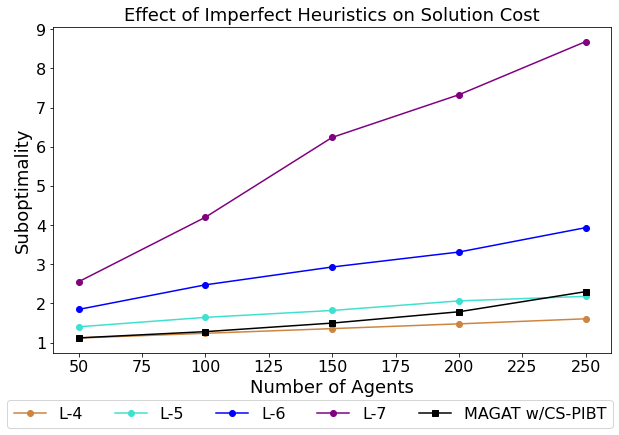

In [39]:
lacamDataFunc = lambda x, noise: "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_noisy_{}_{}_5seeds.csv".format(x, noise)
dfLowerBounds = pd.read_csv(lacamDataFunc("lacam", 1))

fig, ax = plt.subplots(figsize=(10, 6))
# colors = ['cyan', 'peru', 'green', 'red']
# for i, aSetting in enumerate([0, 5, 10, 20]):
colors = ['peru', 'turquoise', 'blue', 'purple']
for i, aSetting in enumerate([4,5,6,7]):
    c = colors[i]
    if aSetting == 0:
        df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv")
    else:
        df = pd.read_csv(lacamDataFunc("lacam", aSetting))
    df = df[df["agents"] <= 250]

    data = []
    dataLimNodes = []
    for agentNum in df["agents"].unique():
        agentDf = df.loc[(df["agents"] == agentNum) & (df["solved"] == 1)]
        # agentDf = agentDf.loc[agentDf["total_nodes_opened"] < 1]
        data.append((agentDf["soc"]/agentDf["soc_lb"]).median())
    ax.plot(df["agents"].unique(), data, label="{}-{}".format("L", aSetting), c=c, marker='o')


# magatData = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSPIBT.csv"
magatData = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt.csv"
df = pd.read_csv(magatData)
df = pd.merge(df, dfLowerBounds, on=["scen_name", "agents", "seed"], how="inner") # Adds soc_lb
df = df[df["agents"] <= 250]
data = []
for agentNum in df["agents"].unique():
    agentDf = df.loc[(df["agents"] == agentNum) & (df["magatSucceed"] == 1)]
    data.append((agentDf["magatCost"]/agentDf["soc_lb"]).median())
ax.plot(df["agents"].unique(), data, c="black", marker='s', label="MAGAT w/CS-PIBT")
# ax.plot(np.NaN, np.NaN, '-', color='none', label=" ")
# ax.plot(np.NaN, np.NaN, '-', color='none', label=" ")

ax.set_title("Effect of Imperfect Heuristics on Solution Cost")
# ax.set_yscale("log")
ax.set_ylabel('Suboptimality')
ax.set_xlabel('Number of Agents')
ax.legend(loc='upper center', bbox_to_anchor=(0.46, -0.12), ncol=5)

filename = "fig-noise-cost-close250.pdf"
# filename = "fig-noise-cost-big250.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=600)

### Weighted Sum

SKIP
SKIP
SKIP
SKIP
SKIP
SKIP
SKIP
SKIP
SKIP
SKIP
SKIP
SKIP


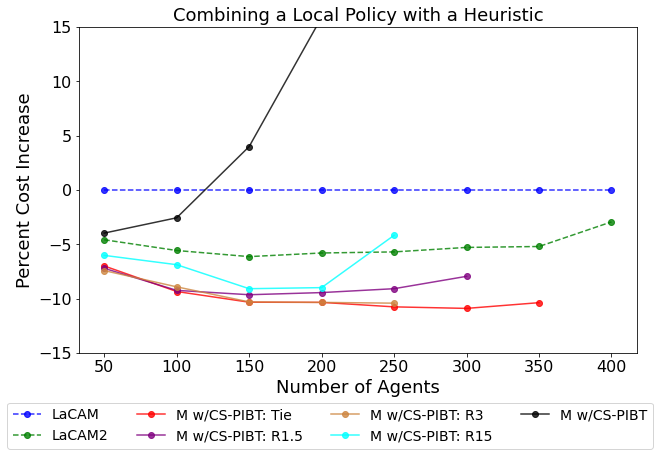

In [25]:
basePath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv"
# basePath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_avoidAgentTie_lacam_5seeds.csv"
# basePath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_avoidAgentTie_pibt_5seeds.csv"
baseDf = pd.read_csv(basePath)
filePath = lambda r : "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatR{}.csv".format(r)

# numAgents = range(50, 451, 50)
numAgents = range(50, 401, 50)

# Each df has a name, label, and color
dfs = [
    "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_20seeds.csv",
    "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_avoidAgentTie_lacam_5seeds.csv",
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatR30.csv", # Original tiebreak
    "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_tiebreak.csv", # New updated one
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatR150.csv",
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatR300.csv",
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatR1500.csv",
    "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_r150.csv", 
    "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_r300.csv",
    "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt_r1500.csv",
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatDataCSPIBT.csv", # Original one
    "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magat_update2_pibt.csv", # New updated one
### lacamDfs below
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_rweightall3_5seeds.csv",
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_rweightall15_5seeds.csv",
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_rweightall30_5seeds.csv",
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_rweightall150_5seeds.csv",
    # "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_rweightall1000_5seeds.csv",
]

# labels = ["LaCAM", "LaCAM2", "Tie-Break", "R1.5", "R3", "R15", "MAGAT"]
labels = ["LaCAM", "LaCAM2", "M w/CS-PIBT: Tie", "M w/CS-PIBT: R1.5", "M w/CS-PIBT: R3",
        "M w/CS-PIBT: R15", "M w/CS-PIBT"]
colors = ["blue", "green", "red", "purple", "peru" , "cyan", "black"]

fig, ax = plt.subplots(figsize=(10, 6))
## Add lines per rVal
for dfName, label, c in zip(dfs, labels, colors):
    df = pd.read_csv(dfName)
    df = pd.merge(df, baseDf, on=["scen_name", "agents", "seed"], how="inner", suffixes=("", "_base")) # Adds soc_lb
    if "magat" in dfName:
        df["solved_base"] = df["solved"]
        df["solved"] = df["magatSucceed"]
        df["soc_base"] = df["soc"]
        df["soc"] = df["magatCost"] 
        tmpDf = df.loc[df["solved"] == 1]
        # print((tmpDf["agents"]/tmpDf["magatCost"]).median())
        
    data = []
    # print(df.shape, df.columns)
    for agentNum in numAgents:
        agentDf = df.loc[(df["agents"] == agentNum) & (df["solved"] == 1) & (df["solved_base"] == 1)]
        if (len(agentDf) == 0):
            data.append(np.nan)
            print("SKIP")
            continue
        data.append(100*((agentDf["soc"]-agentDf["soc_base"])/agentDf["soc_base"]).median())
        # agentDf = df.loc[(df["agents"] == agentNum)]
        # data.append(agentDf["solved"].mean())
    lineStyle = "-" if "magat" in dfName else "--"
    ax.plot(numAgents, data, label="{}".format(label), marker='o', c=c, alpha=0.8, linestyle=lineStyle)

## Add regular LaCAM
# data = []
# for agentNum in numAgents:
#     agentDf = baseDf.loc[(baseDf["agents"] == agentNum) & (baseDf["solved"] == 1)]
#     if (len(agentDf) == 0):
#             data.append(np.nan)
#             continue
#     data.append((agentDf["soc"]/agentDf["soc_lb"]).median())
# ax.plot(numAgents, data, label="LaCAM")


ax.set_title("Combining a Local Policy with a Heuristic")
# ax.set_yscale("log")
ax.set_ylim(-15, 15)
ax.set_ylabel('Percent Cost Increase')
ax.set_xlabel('Number of Agents')
ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.13), ncol=4, fontsize=14)
# ax.set_ylabel('Success Rate')
plt.savefig("fig-combining-policy-heuristic-success.pdf", bbox_inches='tight', dpi=600)

### Runtime Overhead

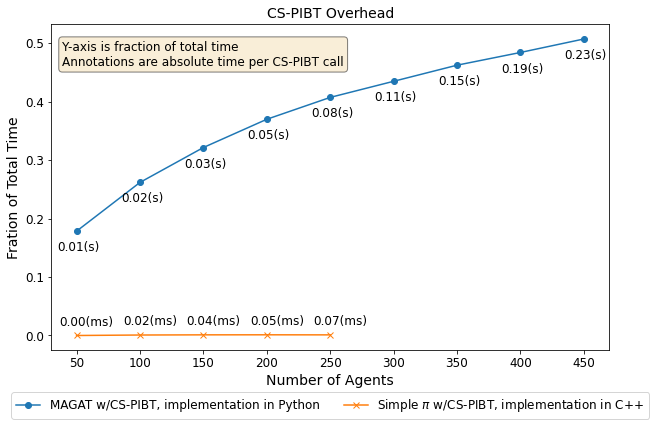

In [3]:
magatPath = "/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/magatR150.csv"
df = pd.read_csv(magatPath)

nnDf = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_pibt_5seeds.csv")
baseDf = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonn_pibt_20seeds.csv")
nnDf = pd.merge(nnDf, baseDf, on=["scen_name", "agents", "seed"], how="inner", suffixes=("", "_base"))

# nnDf = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/random_1_unweight_w4_5seeds.csv")
# baseDf = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/nonnfull.csv")
# nnDf = pd.merge(nnDf, baseDf, on=["scen_name", "agents", "seed"], how="inner", suffixes=("", "_base"))

fig, ax = plt.subplots(figsize=(10, 6))
## Add lines per rVal
data = []
yVals = []
cppData = []
cppAnotate = []
numAgents = range(50, 451, 50)
for agentNum in numAgents:
    agentDf = df.loc[(df["agents"] == agentNum) & (df["magatSucceed"] == 1)]
    if (len(agentDf) == 0):
        data.append(np.nan)
        continue
    data.append((agentDf["pibtShieldTime"]/agentDf["totalTime"]).median())
    yVals.append((agentDf["pibtShieldTime"]/agentDf["magatMakespan"]).median())

    agentDf = nnDf.loc[(nnDf["agents"] == agentNum) & (nnDf["solved"] == 1)]
    if (len(agentDf) == 0):
        cppData.append(np.nan)
        continue
    totalPer = agentDf["comp_time"]/agentDf["total_nodes_opened"]
    cspibtPer = agentDf["comp_time_base"]/agentDf["total_nodes_opened_base"]
    cppAnotate.append(cspibtPer.median())
    cppData.append((cspibtPer/totalPer).median())
ax.plot(numAgents, data, label="MAGAT w/CS-PIBT, implementation in Python", marker='o')
ax.plot(numAgents, cppData, label="Simple $\pi$ w/CS-PIBT, implementation in C++", marker='x')

# Add annotations
for i, a in enumerate(yVals):
    if np.isnan(a):
        continue
    ax.annotate("{:.2f}(s)".format(a), (numAgents[i], data[i]), textcoords="offset points", xytext=(2, -20), ha='center')

for i, a in enumerate(cppAnotate):
    if np.isnan(a):
        continue
    ax.annotate("{:.2f}(ms)".format(a), (numAgents[i], cppData[i]), textcoords="offset points", xytext=(10, 10), ha='center')

# Add single box annotation in bottom right of plot
# ax.annotate("WQIUHIQWUHDIUWQHD", (0.5, 0.05), textcoords="axes fraction", xytext=(0, 0), ha='right')
# ax.text(45, 0.48, 'Annotations are absolute time per CS-PIBT call', size=12, color='purple')

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
textString = "Y-axis is fraction of total time\nAnnotations are absolute time per CS-PIBT call"
ax.text(0.02, 0.95, textString, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_title("CS-PIBT Overhead")
# ax.set_yscale("log")
ax.set_ylabel('Fration of Total Time')
ax.set_xlabel('Number of Agents')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11), ncol=5)
# plt.savefig("fig-runtime-overhead.pdf", bbox_inches='tight', dpi=600)

### EECBS Results

In [46]:
df = pd.read_csv("/home/rishi/Desktop/CMU/Research/ml-mapf/lacam/lacam_original/logs/random-32-32-10/eecbs5.csv")
df["success"] = df["runtime"] < 60
df["agents"] = df["agent num"]
df["soc"] = df["solution cost"]
for agentNum in df["agents"].unique():
    agentDf = df.loc[df["agents"] == agentNum]
    print(agentNum, len(agentDf), agentDf["success"].mean())
    agentDf = agentDf.loc[agentDf["success"] == 1]
    print(len(agentDf), agentDf["soc"].median())

50 25 1.0
25 1113.0
100 25 1.0
25 2302.0
150 25 1.0
25 3592.0
200 25 1.0
25 5166.0
250 25 1.0
25 7385.0
300 25 1.0
25 11006.0
350 25 1.0
25 15930.0
400 25 0.88
22 20654.5
450 25 0.0
0 nan
